In [2]:
#load the necessary packages:
import numpy as np
import pandas as pd
import cimcb as cb
from sklearn.model_selection import train_test_split
import seaborn as sns
np.random.seed(42)
print('All packages successfully loaded')

Using Theano backend.


All packages successfully loaded


In [3]:
# load the necessary file:
file = 'MTBLS136.xlsx'  

DataTable,PeakTable = cb.utils.load_dataXL(file, DataSheet='Data', PeakSheet='Peak') 

Loadings PeakFile: Peak
Loadings DataFile: Data
Data Table & Peak Table is suitable.
TOTAL SAMPLES: 1649 TOTAL PEAKS: 949
Done!


In [4]:
DataTable

Idx      SampleID  Class  Hormone  M1  M2  M3        M4         M5  \
1        1     063942_01    2.0  Nonuser NaN NaN NaN   95695.0  311381856   
2        2     037523_02    0.0   E-only NaN NaN NaN  503202.0   98715432   
3        3     073016_03    0.0   E-only NaN NaN NaN  104038.0  145110144   
4        4     061210_01    2.0  Nonuser NaN NaN NaN  366910.0  156989408   
5        5     063862_01    0.0   E-only NaN NaN NaN  608979.0  140037936   
...    ...           ...    ...      ...  ..  ..  ..       ...        ...   
1645  1645  IU_4945_1001    NaN      NaN NaN NaN NaN  115469.0  147413616   
1646  1646  IU_5881_1000    NaN      NaN NaN NaN NaN       NaN  141172224   
1647  1647  IU_5881_1001    NaN      NaN NaN NaN NaN       NaN  145479904   
1648  1648  IU_4945_1000    NaN      NaN NaN NaN NaN  478657.0  156384400   
1649  1649  IU_5193_1000    NaN      NaN NaN NaN NaN       NaN  148171072   

             M6  ...       M940       M941  M942        M943         M944  \
1     4701657.0  ...        NaN   641183.0   NaN  29736404.0  146489552.0   
2      753959.0  ...  2544193.0   548504.0   NaN         NaN          NaN   
3           NaN  ...   403755.0   768151.0   NaN         NaN          NaN   
4      549563.0  ...   561696.0  1008375.0   NaN         NaN          NaN   
5     1326962.0  ...    48161.0   750182.0   NaN         NaN          NaN   
...         ...  ...        ...        ...   ...         ...          ...   
1645   576361.0  ...   144390.0   338859.0   NaN         NaN          NaN   
1646        NaN  ...        NaN   511543.0   NaN         NaN          NaN   
1647   221693.0  ...        NaN   563088.0   NaN         NaN          NaN   
1648   731069.0  ...   166907.0   418370.0   NaN         NaN          NaN   
1649   484084.0  ...    41187.0   392013.0   NaN         NaN          NaN   

            M945      M946      M947       M948       M949  
1     25615702.0  125249.0  209356.0  1406015.0  8034717.0  
2     39473920.0  192490.0  156234.0   808012.0  1031587.0  
3     25694854.0  233899.0  129411.0  1166341.0   630163.0  
4     26806070.0   99558.0       NaN  2180112.0  1008026.0  
5     33121192.0       NaN  125668.0   552264.0  1529796.0  
...          ...       ...       ...        ...        ...  
1645  24838220.0   99708.0   64767.0  1244962.0  1651202.0  
1646  57732092.0  160562.0       NaN  1373740.0   475267.0  
1647  68145600.0  172044.0   57869.0  1522911.0   460609.0  
1648  26290880.0  116872.0       NaN  1116896.0  1980565.0  
1649  26832696.0   85120.0   71943.0  1281148.0  1059509.0  

[1649 rows x 953 columns]

In [5]:
#the Idx column is dropped and SampleID column is made index.
DataTable= DataTable.drop(["Idx"], axis= 1)
DataTable= DataTable.set_index("SampleID")

<AxesSubplot:ylabel='SampleID'>

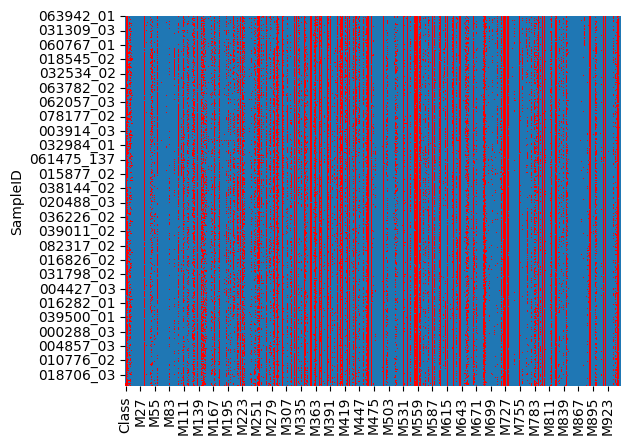

In [9]:
# heatmap for observing some missing values.
cols = DataTable.columns
colors = ['#008000', '#ff0000']
sns.heatmap(DataTable[cols].isnull(), cmap=sns.color_palette(['#1f77b4', '#ff0000']),
            cbar=False, linecolor='gray')

In [8]:
# see if any NA in the whole df:
DataTable.isna().sum().sum()

310432

# Make the data dirty:

In [10]:
# randomly remove 10% of the values:
mask_10 = np.random.choice([True,False],size=DataTable.shape,p=[0.1,0.9])
miss_10_DataTable = DataTable.mask(mask_10,other=np.nan)
miss_10_DataSet = miss_10_DataTable.copy()# used later on for removing irrelevant rows

In [11]:
# randomly remove 50% of the values
mask_50 = np.random.choice([True,False],size=DataTable.shape,p=[0.5,0.5])
miss_50_DataTable = DataTable.mask(mask_50,other=np.nan)
miss_50_DataSet = miss_50_DataTable.copy()# used later on for removing irrelevant rows

In [12]:
# randomly change 10% of the values
change_10 = np.random.randint(low= 500000, high= 8000000,size= DataTable.shape)
change_10_DataTable = DataTable.mask(mask_10,other=change_10)
change_10_DataSet = change_10_DataTable.copy()# used later on for removing irrelevant data




In [13]:
# randomly change 50% of the values
change_50 = np.random.randint(low= 500000, high= 8000000,size= DataTable.shape)
change_50_DataTable = DataTable.mask(mask_50,other=change_50)
change_50_DataSet = change_50_DataTable.copy()# used later on for removing irrelevant data





<AxesSubplot:ylabel='SampleID'>

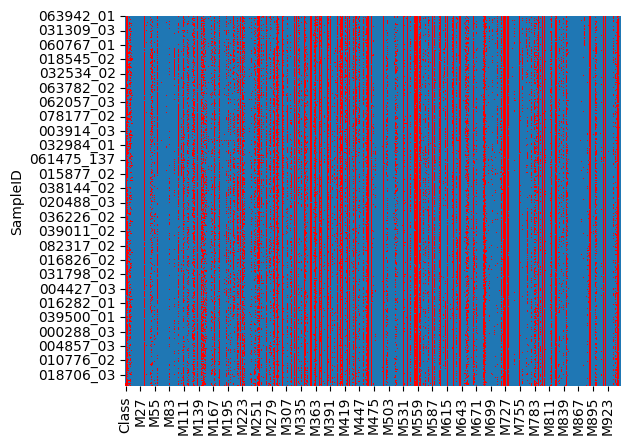

In [12]:
# heatmap for observing some missing values.
cols = DataTable.columns
colors = ['#008000', '#ff0000']
sns.heatmap(DataTable[cols].isnull(), cmap=sns.color_palette(['#1f77b4', '#ff0000']),
            cbar=False, linecolor='gray')

<AxesSubplot:ylabel='SampleID'>

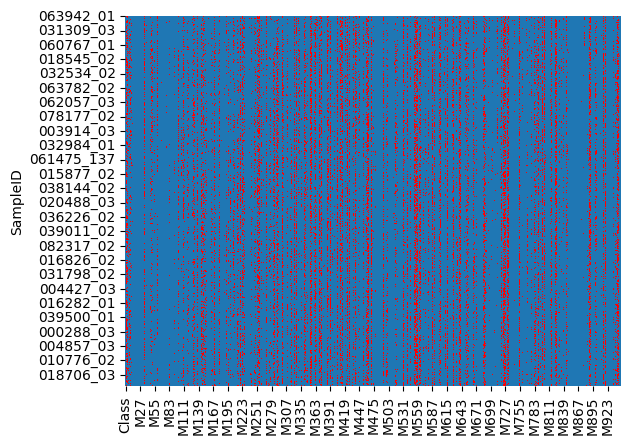

In [13]:
# heatmap for observing some missing values.
cols = change_50_DataSet.columns
colors = ['#008000', '#ff0000']
sns.heatmap(change_50_DataSet[cols].isnull(), cmap=sns.color_palette(['#1f77b4', '#ff0000']),
            cbar=False, linecolor='gray')

# cleaning the data:

# Median imputation:

## for 10% missing:

<AxesSubplot:ylabel='SampleID'>

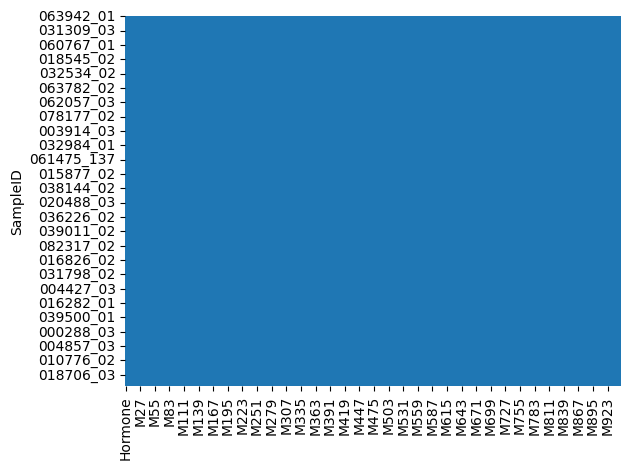

In [14]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = miss_10_DataTable._get_numeric_data().copy()
numeric_cols = df_numeric.columns.values
#impute using median for numberic columns:
for col in numeric_cols:
    df_numeric[col].fillna(df_numeric[col].median(), inplace=True)

#impute using mode() for non numeric columns
df_non_numeric = miss_10_DataTable.select_dtypes(exclude=np.number).copy()
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    df_non_numeric[col].fillna(df_non_numeric[col].mode()[0], inplace=True)
    
#concatinate both imputed non numeric and numeric data:
imputed_10_miss = pd.concat([df_non_numeric,df_numeric], axis=1, join='inner')
#plot the missing vs no missing after imputation:
cols = imputed_10_miss.columns
colors = ['#008000', '#ff0000']
sns.heatmap(imputed_10_miss[cols].isnull(), cmap=sns.color_palette(['#1f77b4', '#ff0000']),
            cbar=False, linecolor='gray')

In [15]:
# check if any missings remain in the data:
imputed_10_miss.columns[imputed_10_miss.isna().any()].tolist()

[]

# ML: SVM-LIN

In [16]:
# Clean PeakTable and Extract PeakList
PercMiss = PeakTable['Perc_missing']  
PeakTableClean = PeakTable[(PercMiss < 20)] 
PeakList = PeakTableClean['Name']  

# Select Subset of Data
DataTable2 = imputed_10_miss[(imputed_10_miss.Class == 1) | (imputed_10_miss.Class == 0)]

# Create a Binary Y Vector 
Outcomes = DataTable2['Class']
Y = Outcomes.values 

# Split Data into Train (2/3) and Test (1/3)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=85)

# Extract Train Data 
XTrain = DataTrain[PeakList]                                    
XTrainLog = np.log(XTrain)                                          
XTrainScale, mu, sigma = cb.utils.scale(XTrainLog, method='auto', return_mu_sigma=True)              
XTrainKnn = XTrainScale# cb.utils.knnimpute(XTrainScale, k=3)    

# Extract Test Data
XTest = DataTest[PeakList]                                     
XTestLog = np.log(XTest)                                          
XTestScale = cb.utils.scale(XTestLog, method='auto', mu=mu, sigma=sigma) 
XTestKnn = XTestScale #cb.utils.knnimpute(XTestScale, k=3)                                                                                                                 

In [17]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...


2/2: 100%|██████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 71.17it/s]


Time taken: 1.29 minutes with 30 cores
Done!


Loading BokehJS ...

Loading BokehJS ...

In [18]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...


2/2: 100%|██████████████████████████████████████████████████████████████████████████████| 70/70 [00:01<00:00, 48.36it/s]


Time taken: 0.08 minutes with 30 cores
Done!


Loading BokehJS ...

Loading BokehJS ...

In [19]:
# Parameter Dictionary
#C_range = [1e-6,1e-5,1e-4,5e-4,1e-3,5e-3,1e-2,1e-1]
C_range = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                                 

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')   

Running ...


2/2: 100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 43.82it/s]


Time taken: 0.11 minutes with 30 cores
Done!


Loading BokehJS ...

Loading BokehJS ...

In [20]:
# Build Model
model = cb.model.SVM(C=0.0005, kernel="linear")     
YPredTrain = model.train(XTrainKnn, YTrain)
YPredTest = model.test(XTestKnn)

# Put YTrain and YPredTrain in a List
EvalTrain = [YTrain, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [YTest, YPredTest]

# Evaluate Model (include Test Dataset)
model.evaluate(testset=EvalTest) 

Loading BokehJS ...

In [21]:
# Extract X Data
XBoot = DataTable2[PeakList]
XBootLog = np.log(XBoot)
XBootScale = cb.utils.scale(XBootLog, method='auto')
#XBootKnn = XBootScale #cb.utils.knnimpute(XBootScale, k=3)
YPredBoot = model.train(XBootScale, Y)

# Build Boostrap Models
bootmodel = cb.bootstrap.Per(model, bootnum=100) 
bootmodel.run()

# Boostrap Evaluate Model (include Test Dataset)
bootmodel.evaluate(trainset=EvalTrain, testset=EvalTest)  

Number of cores set to: 128


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 70.31it/s]


Time taken: 0.18 minutes with 128 cores


Loading BokehJS ...

In [22]:
coef = model.model.coef_ # extract coefficient
important_feat = abs(coef[0])
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:5]
#get more information from peaktable:
top_met = PeakList.iloc[idx]
top_met_info = PeakTable.iloc[top_met.index-1]
#5 most important metabolites
top_met_info

Idx  Name                                              Label  \
41    41   M41                            1-linoleoyl-GPA (18:2)*   
618  618  M618                                             lysine   
123  123  M123                                  2-aminoheptanoate   
476  476  M476                        gamma-glutamyl-alpha-lysine   
576  576  M576  Isobar: fructose 6-phosphate, fructose 1-phosp...   

     Perc_missing  
41       0.303214  
618      0.000000  
123      0.000000  
476      0.060643  
576      2.546998

# ML RF:

In [23]:
# Parameter Dictionary
depth = list(range(1,11))
leaf_asfraction = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

param_dict = dict(max_depth=depth,
                  min_samples_leaf=leaf_asfraction,
                  max_features='sqrt',
                  criterion='gini',
                  min_samples_split=2,
                  max_leaf_nodes=None,
                  n_estimators=100)

# Initialise
cv = cb.cross_val.KFold(model=cb.model.RF,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)       
                              

# Run and Plot
cv.run()  
cv.plot(metric='auc', color_beta=[5,5,3])
cv.plot(metric='r2q2', color_beta=[5,5,3])

Running ...


1/2:   0%|                                                                                      | 0/110 [00:00<?, ?it/s]Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
2/2: 100%|██████████████████████████████████████████████████████████████████████████| 1100/1100 [00:52<00:00, 20.86it/s]


Time taken: 2.07 minutes with 30 cores
Done!


/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a

Loading BokehJS ...

/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a

Loading BokehJS ...

In [24]:
# Build Model
model = cb.model.RF(max_depth=7,
                    min_samples_leaf=0.05,
                    max_features='sqrt',
                    criterion='gini',
                    min_samples_split=2,
                    max_leaf_nodes=None,
                    n_estimators=100) 
YPredTrain = model.train(XTrainKnn, YTrain)
YPredTest = model.test(XTestKnn)

# Put YTrain and YPredTrain in a List
EvalTrain = [YTrain, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [YTest, YPredTest]

# Evaluate Model (include Test Dataset
model.evaluate(testset=EvalTest) 

Loading BokehJS ...

In [25]:
# Extract X Data
XBoot = DataTable2[PeakList]
XBootLog = np.log(XBoot)
XBootScale = cb.utils.scale(XBootLog, method='auto')
#XBootKnn = XBootScale #cb.utils.knnimpute(XBootScale, k=3)
YPredBoot = model.train(XBootScale, Y)

# Build Boostrap Models
bootmodel = cb.bootstrap.Per(model, bootnum=100) 
bootmodel.run()

# Boostrap Evaluate Model (include Test Dataset)
bootmodel.evaluate(trainset=EvalTrain, testset=EvalTest)   

Number of cores set to: 128


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.56it/s]


Time taken: 0.22 minutes with 128 cores


Loading BokehJS ...

In [26]:
# for important metabolies / features:
important_feat = model.model.feature_importances_
important_feat = abs(important_feat)
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:5]
#get more information from peaktable:
top_met = PeakList.iloc[idx]
top_met_info = PeakTable.iloc[top_met.index-1]
#5 most important metabolites
top_met_info

Idx  Name                                          Label  Perc_missing
41    41   M41                        1-linoleoyl-GPA (18:2)*      0.303214
742  742  M742  oleoyl-arachidonoyl-glycerol (18:1/20:4) [2]*      0.363857
476  476  M476                    gamma-glutamyl-alpha-lysine      0.060643
123  123  M123                              2-aminoheptanoate      0.000000
143  143  M143                     2-linoleoylglycerol (18:2)      0.545785

# 50% removed: median imputation

In [27]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = miss_50_DataTable._get_numeric_data().copy()
numeric_cols = df_numeric.columns.values
# imputation for numeric values:
for col in numeric_cols:
    df_numeric[col].fillna(df_numeric[col].median(), inplace=True)



/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117

In [28]:
#check if anything nans remaining due to only nans in data, remove them
only_missings= df_numeric.columns[df_numeric.isna().any()].tolist()# remove them because of too many NANs in column.
df_numeric= df_numeric.drop(only_missings, axis=1)

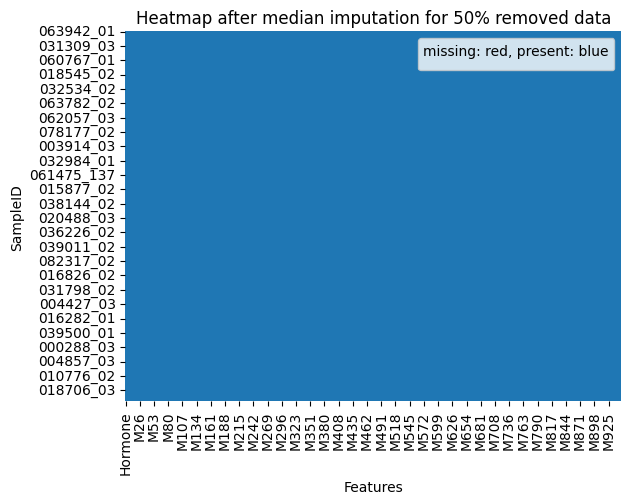

In [29]:
#for non-numeric columns using mode:
df_non_numeric = miss_50_DataTable.select_dtypes(exclude=np.number).copy()
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    df_non_numeric[col].fillna(df_non_numeric[col].mode()[0], inplace=True)
    
#concatinate the non and numeric df:
imputed_50_miss = pd.concat([df_non_numeric,df_numeric], axis=1, join='inner')
#plot the missing vs no missing after imputation:
import matplotlib.pyplot as plt
cols = imputed_50_miss.columns
colors = ['#008000', '#ff0000']
m_heatmap= sns.heatmap(imputed_50_miss[cols].isnull(), cmap=sns.color_palette(['#1f77b4', '#ff0000']),
            cbar=False, linecolor='gray')
m_heatmap.set_xlabel('Features')
m_heatmap.set_title('Heatmap after median imputation for 50% removed data')
m_heatmap.legend(title='missing: red, present: blue', labels=['Present', 'Missing'], loc='upper right')

In [30]:
imputed_50_miss.columns[imputed_50_miss.isna().any()].tolist()

[]

In [31]:
# Clean PeakTable and Extract PeakList
PercMiss = PeakTable['Perc_missing']  
PeakTableClean = PeakTable[(PercMiss < 20)] 
PeakList = PeakTableClean['Name']  

# Select Subset of Data
DataTable2 = imputed_50_miss[(imputed_50_miss.Class == 1) | (imputed_50_miss.Class == 0)]

# Create a Binary Y Vector 
Outcomes = DataTable2['Class']
Y = Outcomes.values 

# Split Data into Train (2/3) and Test (1/3)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=85)

# Extract Train Data 
XTrain = DataTrain[PeakList]                                    
XTrainLog = np.log(XTrain)                                          
XTrainScale, mu, sigma = cb.utils.scale(XTrainLog, method='auto', return_mu_sigma=True)              
XTrainKnn = XTrainScale# cb.utils.knnimpute(XTrainScale, k=3)    

# Extract Test Data
XTest = DataTest[PeakList]                                     
XTestLog = np.log(XTest)                                          
XTestScale = cb.utils.scale(XTestLog, method='auto', mu=mu, sigma=sigma) 
XTestKnn = XTestScale #cb.utils.knnimpute(XTestScale, k=3)                                                                                                                 

In [32]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...


1/2:   0%|                                                                                        | 0/7 [00:00<?, ?it/s]Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
2/2: 100%|█████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 190.28it/s]


Time taken: 1.64 minutes with 30 cores
Done!


Loading BokehJS ...

Loading BokehJS ...

In [33]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...


2/2: 100%|█████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 159.92it/s]


Time taken: 0.03 minutes with 30 cores
Done!


Loading BokehJS ...

Loading BokehJS ...

In [34]:
# Parameter Dictionary
#C_range = [1e-6,1e-5,1e-4,5e-4,1e-3,5e-3,1e-2,1e-1]
C_range = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                                 

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')   

Running ...


2/2: 100%|███████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 113.39it/s]


Time taken: 0.03 minutes with 30 cores
Done!


Loading BokehJS ...

Loading BokehJS ...

In [35]:
# Build Model
model = cb.model.SVM(C=0.0005, kernel="linear")     
YPredTrain = model.train(XTrainKnn, YTrain)
YPredTest = model.test(XTestKnn)

# Put YTrain and YPredTrain in a List
EvalTrain = [YTrain, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [YTest, YPredTest]

# Evaluate Model (include Test Dataset)
model.evaluate(testset=EvalTest) 

Loading BokehJS ...

In [36]:
# Extract X Data
XBoot = DataTable2[PeakList]
XBootLog = np.log(XBoot)
XBootScale = cb.utils.scale(XBootLog, method='auto')
#XBootKnn = XBootScale #cb.utils.knnimpute(XBootScale, k=3)
YPredBoot = model.train(XBootScale, Y)

# Build Boostrap Models
bootmodel = cb.bootstrap.Per(model, bootnum=100) 
bootmodel.run()

# Boostrap Evaluate Model (include Test Dataset)
bootmodel.evaluate(trainset=EvalTrain, testset=EvalTest)  

Number of cores set to: 128


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.26it/s]


Time taken: 0.11 minutes with 128 cores


Loading BokehJS ...

In [37]:
coef = model.model.coef_ # extract coefficient
important_feat = abs(coef[0])
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:5]
#get more information from peaktable:
top_met = PeakList.iloc[idx]
top_met_info = PeakTable.iloc[top_met.index-1]
#5 most important metabolites
top_met_info

Idx  Name                                          Label  Perc_missing
907  907  M907                                   theophylline     14.918132
910  910  M910                                      threonine      0.000000
305  305  M305    androstenediol (3beta,17beta) disulfate (2)      0.000000
39    39   M39  1-linoleoyl-2-arachidonoyl-GPC (18:2/20:4n6)*      1.030928
122  122  M122                                2-aminobutyrate      0.000000

# RF

In [38]:
# Parameter Dictionary
depth = list(range(1,11))
leaf_asfraction = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

param_dict = dict(max_depth=depth,
                  min_samples_leaf=leaf_asfraction,
                  max_features='sqrt',
                  criterion='gini',
                  min_samples_split=2,
                  max_leaf_nodes=None,
                  n_estimators=100)

# Initialise
cv = cb.cross_val.KFold(model=cb.model.RF,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)       
                              

# Run and Plot
cv.run()  
cv.plot(metric='auc', color_beta=[5,5,3])
cv.plot(metric='r2q2', color_beta=[5,5,3])

Running ...


1/2:   0%|                                                                                      | 0/110 [00:00<?, ?it/s]Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
2/2: 100%|██████████████████████████████████████████████████████████████████████████| 1100/1100 [00:43<00:00, 25.17it/s]


Time taken: 2.54 minutes with 30 cores
Done!


/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a

Loading BokehJS ...

/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/home/anepal/.conda/envs/process_env/envs/MetabComparisonBinaryML/lib/python3.7/site-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a

Loading BokehJS ...

In [39]:
# Build Model
model = cb.model.RF(max_depth=7,
                    min_samples_leaf=0.05,
                    max_features='sqrt',
                    criterion='gini',
                    min_samples_split=2,
                    max_leaf_nodes=None,
                    n_estimators=100) 
YPredTrain = model.train(XTrainKnn, YTrain)
YPredTest = model.test(XTestKnn)

# Put YTrain and YPredTrain in a List
EvalTrain = [YTrain, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [YTest, YPredTest]

# Evaluate Model (include Test Dataset
model.evaluate(testset=EvalTest) 

Loading BokehJS ...

In [40]:
# Extract X Data
XBoot = DataTable2[PeakList]
XBootLog = np.log(XBoot)
XBootScale = cb.utils.scale(XBootLog, method='auto')
XBootKnn = XBootScale #cb.utils.knnimpute(XBootScale, k=3)
YPredBoot = model.train(XBootKnn, Y)

# Build Boostrap Models
bootmodel = cb.bootstrap.Per(model, bootnum=100) 
bootmodel.run()

# Boostrap Evaluate Model (include Test Dataset)
bootmodel.evaluate(trainset=EvalTrain, testset=EvalTest)   

Number of cores set to: 128


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.88it/s]


Time taken: 0.16 minutes with 128 cores


Loading BokehJS ...

In [41]:
# for important metabolies / features:
important_feat = model.model.feature_importances_
important_feat = abs(important_feat)
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:5]
#get more information from peaktable:
top_met = PeakList.iloc[idx]
top_met_info = PeakTable.iloc[top_met.index-1]
#5 most important metabolites
top_met_info

Idx  Name                                          Label  Perc_missing
86    86   M86      1-stearoyl-2-arachidonoyl-GPI (18:0/20:4)      0.060643
29    29   M29                   1-arachidonoyl-GPC (20:4n6)*      0.000000
613  613  M613  linoleoyl-linoleoyl-glycerol (18:2/18:2) [1]*      0.000000
221  221  M221                           4-guanidinobutanoate      0.000000
77    77   M77                         1-palmitoyl-GPA (16:0)      2.910855

Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.


# removing irrelevant data for 10% changes:

In [42]:
#irr_rem_change_10_DataSet= change_50_DataSet.drop(['M464'], axis=1)
irr_rem_change_10_DataSet= change_10_DataSet.dropna()
irr_rem_change_10_DataSet


Empty DataFrame
Columns: [Class, Hormone, M1, M2, M3, M4, M5, M6, M7, M8, M9, M10, M11, M12, M13, M14, M15, M16, M17, M18, M19, M20, M21, M22, M23, M24, M25, M26, M27, M28, M29, M30, M31, M32, M33, M34, M35, M36, M37, M38, M39, M40, M41, M42, M43, M44, M45, M46, M47, M48, M49, M50, M51, M52, M53, M54, M55, M56, M57, M58, M59, M60, M61, M62, M63, M64, M65, M66, M67, M68, M69, M70, M71, M72, M73, M74, M75, M76, M77, M78, M79, M80, M81, M82, M83, M84, M85, M86, M87, M88, M89, M90, M91, M92, M93, M94, M95, M96, M97, M98, ...]
Index: []

[0 rows x 951 columns]

# removing irrelevant data for 10% missing:

In [43]:
miss_10_DataSet.dropna()

Empty DataFrame
Columns: [Class, Hormone, M1, M2, M3, M4, M5, M6, M7, M8, M9, M10, M11, M12, M13, M14, M15, M16, M17, M18, M19, M20, M21, M22, M23, M24, M25, M26, M27, M28, M29, M30, M31, M32, M33, M34, M35, M36, M37, M38, M39, M40, M41, M42, M43, M44, M45, M46, M47, M48, M49, M50, M51, M52, M53, M54, M55, M56, M57, M58, M59, M60, M61, M62, M63, M64, M65, M66, M67, M68, M69, M70, M71, M72, M73, M74, M75, M76, M77, M78, M79, M80, M81, M82, M83, M84, M85, M86, M87, M88, M89, M90, M91, M92, M93, M94, M95, M96, M97, M98, ...]
Index: []

[0 rows x 951 columns]

In [44]:
#########################################

# for ML dirty dataset:

# dirty 10% missing:

In [16]:
# Clean PeakTable and Extract PeakList
PercMiss = PeakTable['Perc_missing']  
PeakTableClean = PeakTable[(PercMiss < 20)] 
PeakList = PeakTableClean['Name']  

# Select Subset of Data
DataTable2 = miss_10_DataSet[(miss_10_DataSet.Class == 1) | (miss_10_DataSet.Class == 0)]

# Create a Binary Y Vector 
Outcomes = DataTable2['Class']
Y = Outcomes.values 

# Split Data into Train (2/3) and Test (1/3)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=85)

# Extract Train Data 
XTrain = DataTrain[PeakList]                                    
XTrainLog = np.log(XTrain)                                          
XTrainScale, mu, sigma = cb.utils.scale(XTrainLog, method='auto', return_mu_sigma=True)              
XTrainKnn = XTrainScale#cb.utils.knnimpute(XTrainScale, k=3)    

# Extract Test Data
XTest = DataTest[PeakList]                                     
XTestLog = np.log(XTest)                                          
XTestScale = cb.utils.scale(XTestLog, method='auto', mu=mu, sigma=sigma) 
XTestKnn = XTestScale# cb.utils.knnimpute(XTestScale, k=3)                                                                                                                 

In [17]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...



1/2: 100%|███████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 817.40it/s]


TerminatedWorkerError was raised due to excessive memory usage. n_cores was reduced to 1.



1/2:   0%|                                                                                        | 0/7 [00:00<?, ?it/s]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# dirty 50% remove dataset

In [18]:
# Clean PeakTable and Extract PeakList
PercMiss = PeakTable['Perc_missing']  
PeakTableClean = PeakTable[(PercMiss < 20)] 
PeakList = PeakTableClean['Name']  

# Select Subset of Data
DataTable2 = miss_50_DataSet[(miss_50_DataSet.Class == 1) | (miss_50_DataSet.Class == 0)]

# Create a Binary Y Vector 
Outcomes = DataTable2['Class']
Y = Outcomes.values 

# Split Data into Train (2/3) and Test (1/3)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=85)

# Extract Train Data 
XTrain = DataTrain[PeakList]                                    
XTrainLog = np.log(XTrain)                                          
XTrainScale, mu, sigma = cb.utils.scale(XTrainLog, method='auto', return_mu_sigma=True)              
XTrainKnn = XTrainScale#cb.utils.knnimpute(XTrainScale, k=3)    

# Extract Test Data
XTest = DataTest[PeakList]                                     
XTestLog = np.log(XTest)                                          
XTestScale = cb.utils.scale(XTestLog, method='auto', mu=mu, sigma=sigma) 
XTestKnn = XTestScale# cb.utils.knnimpute(XTestScale, k=3)                                                                                                                 

In [19]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...




1/2: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 3062.17it/s]


TerminatedWorkerError was raised due to excessive memory usage. n_cores was reduced to 1.




1/2:   0%|                                                                                        | 0/7 [00:00<?, ?it/s]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# dirty change 10% dataset:

In [20]:
# Clean PeakTable and Extract PeakList
PercMiss = PeakTable['Perc_missing']  
PeakTableClean = PeakTable[(PercMiss < 20)] 
PeakList = PeakTableClean['Name']  

# Select Subset of Data
DataTable2 = change_10_DataSet[(change_10_DataSet.Class == 1) | (change_10_DataSet.Class == 0)]

# Create a Binary Y Vector 
Outcomes = DataTable2['Class']
Y = Outcomes.values 

# Split Data into Train (2/3) and Test (1/3)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=85)

# Extract Train Data 
XTrain = DataTrain[PeakList]                                    
XTrainLog = np.log(XTrain)                                          
XTrainScale, mu, sigma = cb.utils.scale(XTrainLog, method='auto', return_mu_sigma=True)              
XTrainKnn = XTrainScale#cb.utils.knnimpute(XTrainScale, k=3)    

# Extract Test Data
XTest = DataTest[PeakList]                                     
XTestLog = np.log(XTest)                                          
XTestScale = cb.utils.scale(XTestLog, method='auto', mu=mu, sigma=sigma) 
XTestKnn = XTestScale# cb.utils.knnimpute(XTestScale, k=3)                                                                                                                 

In [21]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...





1/2: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 3022.46it/s]


TerminatedWorkerError was raised due to excessive memory usage. n_cores was reduced to 1.





1/2:   0%|                                                                                        | 0/7 [00:00<?, ?it/s]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# dirty change 50% dataset:

In [22]:
# Clean PeakTable and Extract PeakList
PercMiss = PeakTable['Perc_missing']  
PeakTableClean = PeakTable[(PercMiss < 20)] 
PeakList = PeakTableClean['Name']  

# Select Subset of Data
DataTable2 = change_50_DataSet[(change_50_DataSet.Class == 1) | (change_50_DataSet.Class == 0)]

# Create a Binary Y Vector 
Outcomes = DataTable2['Class']
Y = Outcomes.values 

# Split Data into Train (2/3) and Test (1/3)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=85)

# Extract Train Data 
XTrain = DataTrain[PeakList]                                    
XTrainLog = np.log(XTrain)                                          
XTrainScale, mu, sigma = cb.utils.scale(XTrainLog, method='auto', return_mu_sigma=True)              
XTrainKnn = XTrainScale#cb.utils.knnimpute(XTrainScale, k=3)    

# Extract Test Data
XTest = DataTest[PeakList]                                     
XTestLog = np.log(XTest)                                          
XTestScale = cb.utils.scale(XTestLog, method='auto', mu=mu, sigma=sigma) 
XTestKnn = XTestScale# cb.utils.knnimpute(XTestScale, k=3)                                                                                                                 

In [23]:
# Parameter Dictionary
C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1]
param_dict = dict(C=C_range, kernel="linear")               

# Initialise
cv = cb.cross_val.KFold(model=cb.model.SVM,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10,
                       n_cores=30)                            

# Run and Plot
cv.run()  
cv.plot(metric='auc')
cv.plot(metric='r2q2')

Running ...






1/2: 100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1210.08it/s]


TerminatedWorkerError was raised due to excessive memory usage. n_cores was reduced to 1.






1/2:   0%|                                                                                        | 0/7 [00:00<?, ?it/s]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [24]:
# Build Model
model = cb.model.SVM(C=0.0005, kernel="linear")     
YPredTrain = model.train(XTrainKnn, YTrain)
YPredTest = model.test(XTestKnn)

# Put YTrain and YPredTrain in a List
EvalTrain = [YTrain, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [YTest, YPredTest]

# Evaluate Model (include Test Dataset)
model.evaluate(testset=EvalTest) 

1/2:   0%|                                                                                        | 0/7 [01:24<?, ?it/s]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').